<img style="float: left; width: 220px;" src="images/shutterstock_318255209.jpg">
***
## <font color="grey"> $\quad$ Distinct proliferation rates define molecular subtypes of melanoma </font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\mathrm{minimize}\quad}$
$\newcommand{\maximize}{\mathrm{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$
$\newcommand{\conv}{\operatorname{conv}}$
$\newcommand{\inter}{{\operatorname{int}}}$

In the first section (Results) I try to summarise the observations and present some of the results. 

---
## <font color="grey">  1. Results</font>
---

We first describe the data used and how it was prepared, then we present some observations, after that these will be fitted to a model, and finally the results obtained are discussed.

### <font color="grey">  1.1. Data</font>

The primary data is based on whole-exome sequences derived from cancer cells of 323 patient samples, taken from the [The Cancer Genome Atlas (TCGA) skin cutaneous melanoma (SKCM)](https://gdc-portal.nci.nih.gov/projects/TCGA-SKCM) database. For each sample and for each of $96$ types of single nucleotide substitutions (SNVs) in trinucleotide context (for example, ATC $\rightarrow$ AGC), we count the number of times per gigabase pair this substitution occurs.

According to [Alexandrov et al](http://www.nature.com/nature/journal/v500/n7463/full/nature12477.html), the integer vector $\vct{m}$ counting the number of times each of these $96$ substitutions appears can be expressed as a non-negative linear combination **mutation signatures**. The catalog of mutation signatures that we use is from the [COSMIC Database](http://cancer.sanger.ac.uk/cosmic), and the results are verified using a new extraction of signatures using a hierarchical Dirichlet process. Of biggest interest in Melanoma are signatures $1$ and $7$ from this database. Signature $7$ is known to be related to UV exposure.  Signature $1$ is dominated by C>T subsitutions in NpG dinucleotide context, which is believed to be related to the spontaneous deanimation of 5-methylcytosine, and has been observed to accumulate at a constant rate over time in melanoma and some other cancers ([Alexandrov et al](http://www.nature.com/ng/journal/v47/n12/full/ng.3441.html)).

For each sample we estimated the the exposure to mutation signature 1 using a standard procedure and added added information on whether the sample had mutations in BRAF, NRAS, NF1 or none of these genes. Five samples had both BRAF and NRAS mutations. They likely aquired the NRAS mutations as a consequence of targeted therapy, and were excluded from the study. There were $50$ samples with both BRAF/NRAS and NF1 mutations, and they were classified as BRAF or NRAS, respectively. Overall, $163$ samples are BRAF, $88$ samples NRAS, $21$ samples NF1, and the remaining $51$ samples were classified as triple wild type (W3).

For a subset of 258 samples, additional information on the MC1R phenotype (whether an individual has two, one or no 'R' alleles) was included. This information was taken from the supplementary material of [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064).

The data was reduced from a larger data set of $330$ samples by removing $7$ outliers.

### <font color="grey">  1.2. Observations</font>

In [Alexandrov et al](http://www.nature.com/ng/journal/v47/n12/full/ng.3441.html) it was observed that the amount of mutations attributable to signature 1 in a genome was correlated with age, and could be used as a molecular clock. To verify this relationship, for each age we computed a robust Poisson means and observed a linear trend.

![Robust linear regression](linreg.png)
**Figure 1.** Robust linear regression relating median exposure at each age to signature 1. For the robust linear regression relating the total exposure to signature 1 of all samples to age, we get a slope of $3.2$ with $P$-value $0.000853$ (Wald test), and a Spearman $\rho$ correlation of $0.12$ with P-value $0.032$.

We next investigate the difference between BRAF, NRAS, NF1 and triple wild samples. 
![Robust linear regression by type](linreg-allcohort.png)
**Figure 2.** Difference in accumulation between BRAF, NRAS, NF1 and triple wild samples. While there seems to be a visible difference, the Spearman $\rho$ correlation is not statistically significant in either case.

Strikingly, there is a marked difference in accumulation of mutations in NRAS samples between male and female (maybe I should not include this, as it is based on a different model than the analysis below, which doesn't show the differences).

![Robust linear regression by gender](nrasbraf-gender.png)
**Figure 3.** Difference in accumulation between BRAF and NRAS samples relative to gender. For the male samples, we get a slope of $0.84$ (P-value $0.024$) and Spearman $\rho$ correlation $0.27$ (P-value $0.046$). 

To examine the difference in mutation accummulation between the BRAF, NRAS and NF1 mutated samples, we examined the ratio of number of signature 1 mutations to age in these samples, and found statistically significant differences.

![Robust linear regression by gender](boxplot.png)
**Figure 4.** Difference in mean number of mutations by age. NF1, NRAS and triple wild samples differ significantly from BRAF samples (robust linear regression of ratio agains cohort, P-values (robust F-test) $5\cdot 10^{-10}$, $0.001$, and $0.0001$.

In addition, we compare the samples with respect to MC1R alleles. The interesting feature of these plots is that the mutation load in the samples with one or two R-alleles seems to be uniformly higher, but with similar slope.

![MC1R](nrasbraf-mc1r.png)
**Figure 5.** Influcence of number of MC1R R-alleles (0 or at least 1) on the accummulation load of signature 1. 

### <font color="grey">  1.3. Models</font>

So far, the observations were exploratory, identifying differences in signature 1 exposure to age qualitatively.
Following [Podolskiy et al](http://www.nature.com/articles/ncomms12157), the number of time dependent mutations (measured as exposures to signature 1) in a normal cell $N(t)$ present at age $t$ is approximately distributed according to a Poisson distribution with a time dependent rate $\lambda(t)$,

\begin{equation*}
  \mtx{P}\{N(t) = n\} = \frac{\lambda(t)^n e^{-\lambda(t)}}{n!}.
\end{equation*}

While the Poisson model is adequate to model the accumulation of mutations prior to neoplastic expansion, after the appearance of driver mutations the dynamics change as the cell is subject to evolutionary dynamics. This accounts for the observed fat tails of the mutation count data.

![Figure 6](densities.png)
**Figure 6.** Estimated densities over different age ranges.

![Figure 7](nrasbraf-density.png)
**Figure 7.** Densities of BRAF and NRAS samples in one age range.

Following [Podolskiy et al](http://www.nature.com/articles/ncomms12157), for the expected value $\lambda(t)$ 
one can consider

* a linear approximation, $\lambda(t) = \lambda t$,
* or an exponential model $\lambda(t) = N_0 e^{\alpha t}$. 

The linear model may provide a good approximation certain middle age ranges, but the exponential model gives a better fit to the estimated poisson rate $\lambda(t)$.

**The linear model.** The linear model depends on one parameter $\lambda$, that can be estimated from the data using Poisson regression with the logarithm of the age as offset:
\begin{equation*}
  \log \mtx{E}[N(t) \ | \ X_1,\dots,X_p ] = \log(t) + \beta_0 + \sum_{i=1}^p \beta_i X_i,
\end{equation*}
where $N$ is the exposure to signature 1, and $X_1,\dots,X_p$ are other covariates such as gender, MC1R phenotype, or thether mutations appear in BRAF/NRAS/NF1 or non of these genes. Once the model is fitted, the parameter $\lambda$ follows is $\lambda = e^{\beta_0}$.

Under the assumptions of the linear model, in particular, the *ratio* $N/t$, follows the shape Poisson distribution with fixed parameter $\lambda$, though it is assumed that $\lambda$ depends on the cohort (NRAS / BRAF / NF1 / W3) and possibly other parameters. 

\begin{equation*}
  \mtx{P}\{N = tn\} = \frac{\lambda^n e^{-\lambda}}{n!},
\end{equation*}

The estimate of $\lambda$ is gained from a Poisson regression with age as offset. In fact, the following plot shows the distribution of the ratio $N/t$ for ages $>30$.

![Figure 8](ratio-density.png)
**Figure 8.** Densities of Mutation load/age ratio in BRAF and NRAS samples in one age range.

When including additional covariates (gender, number of R-alleles of MC1R, BRAF/NRAS/NF1) into the Poisson regression model, it turns out that all of them are statistically significant (P-value between $10^{-6}$ and $10^{-16}$ for each covariate). 

**The exponential model.** The expenential model depends on two parameters, $N_0$ and $\alpha$, that may again depend on other parameters. Using the **linearization** 
\begin{equation*}
  \lambda(t) = N_0e^{\alpha t} \approx N_0+N_0\alpha t,
\end{equation*}
which works for small values of $\alpha$, we can estimate $N_0$ and $\alpha$ using a linear regression:
\begin{equation*}
  N(t) = \beta_0 + \beta_1 t,
\end{equation*}
where one then determines $N_0=\beta_0$ and $\alpha = \beta_1/\beta_0$. The slope $\beta_1=N_0\alpha$ of this approximation corresponds to the slope in Figures 2-4. 

The *linear model* is consistent with the following assumptions:

* Cells divide at a fixed expected rate $r$ divisions per year;
* Mutations occur at a rate of $u$ mutations per gigabase pair per cell division.

Using these assumptions, one can infer cell proliferation rates from the slopes. While the assumptions of the linear model represent oversimplifications, they lead to systematic errors that hold across different cohorts, and as such still allow to compare properties of the different types of samples to each other. 

We stress that the aim of fitting the Poisson model is not to get an accurate fit of the distribution of the data (which is not Poisson in any case), but to determine the Poisson peak (mean), which should correspond to the largest mixture component of the data. A precise fit would require a mixture of possibly overdispersed Poisson processes, and is left for another project.

### <font color="grey">  1.3. Results</font>

We discuss three types of results. The first shows a difference in the ratio of proliferation between cells with NRAS, BRAF and NF1 mutations. The second result gives an indication that cells with NRAS mutations need more hits than those with BRAF mutions. The third result places the different cohorts in the context of the Tomasetti-Vogelstein intrinsic/extrinis risk graph.

<font color="grey">** 1.3.1. Ratio of proliferation rate**</font>

Based on the linear and exponential Poisson models, we estimate differences in proliferation rates between cells with BRAF, NRAS and NF1 mutations. This remains approximately true when restricting the data to samples to different MC1R status but not gender. Here, by *mutation* we mean one unit of signature 1 exposure.

Denote by $d_{\mathrm{NRAS}}$, $d_{\mathrm{BRAF}}$, $d_{\mathrm{NF1}}$ and $d_{\mathrm{W3}}$ the expected number of cell divisions per year among the cells with NRAS, with BRAF, and with NF1 mutations, respectively. While we can estimate the ratio of these from the data, in order to get estimates of each one we need an estimate of the mutation rate per cell division. This can be calculated by looking at the whole dataset and using the estimate of $2.48$ division per year reported by Tomasetti and Vogelstein.

**Linear model** (*ages 30-70*)
Using the model where the Poisson means accumulate linearly, $\lambda(t)=\lambda t$, and restricting to age range between $30$ and $70$, we get following estimates.

In [3]:
#agedata <- read.csv("divrates_age.csv", header=TRUE, row.names=1)
load("divrates_age.Rdata")
round(age.data, 2)

,Ratio NRAS/BRAF,Ratio NF1/BRAF,Ratio NF1/NRAS,Ratio W3/BRAF,Mutation rate,Division rate NRAS,Division rate BRAF,Division rate NF1,Division rate W3
All,1.28,1.67,1.30,0.46,0.36,3.16,2.47,4.12,1.13
1-2 R,1.10,1.33,1.20,0.42,0.43,2.81,2.55,3.38,1.08
0 R,1.50,2.05,1.37,0.53,0.30,3.51,2.34,4.79,1.24
Male,1.28,1.68,1.32,0.37,0.37,3.10,2.43,4.09,0.90
Female,1.28,1.54,1.20,0.57,0.32,3.26,2.54,3.90,1.46


What we see from these tables is that:
1. The mutation rate per cell division is higher for samples with one or two R MC1R alleles, which confirms what is already known;
2. The estimated ratio between NRAS and BRAF profileration is about 1.28, but also depends on the number of MC1R R alleles. The result is that BRAF mutations are higher in the presence of 1 or 2 MC1R alleles;
3. The estimated rate of cells with NF1 mutations is considerably higher than those with BRAF mutations.


**Linear model** (*all ages*)
When repeating the analysis incorporating all ages, we get the following estimates.

In [5]:
#alldata <- read.csv("divrates_all.csv", header=TRUE, row.names=1)
load("divrates_all.Rdata")
round(all.data, 2)

,Ratio NRAS/BRAF,Ratio NF1/BRAF,Ratio NF1/NRAS,Ratio W3/BRAF,Mutation rate,Division rate NRAS,Division rate BRAF,Division rate NF1,Division rate W3
All,1.31,2.02,1.54,0.62,0.35,2.96,2.25,4.56,1.39
1-2 R,1.26,1.67,1.32,0.86,0.43,2.77,2.20,3.67,1.88
0 R,1.40,2.37,1.69,0.53,0.30,3.16,2.26,5.36,1.21
Male,1.31,2.00,1.52,0.69,0.39,2.85,2.17,4.34,1.49
Female,1.32,1.86,1.41,0.57,0.29,3.17,2.41,4.48,1.37


**Exponential model** (*all ages*). In the exponential model, $\lambda(t) \approx N_0+N_0\alpha t$, we have seen above that many of the regression lines are flat, i.e., there is not mutation accumulation over time. One exception appears to be the the NRAS mutations for male samples. Computing accumulation ratios does not appear meaningful in this setting, but we can compare the slopes.

<font color="grey">** 1.3.2. Number of hits**</font>

It remains to look at the analysis of [Wu et al](http://www.nature.com/nature/journal/v529/n7584/full/nature16166.html). As I don't have any reasonable estimates about the proportion of total tissue susceptible to NRAS or BRAF mutations (is there experimental work on this?), I can't make any sensible calculations of theoretical lifetime intrinsic risk (tLIR), as done by Wu et al. One can, however, use their model to estimate how the number of required hits $k$ depends on the cell division rate. 

Assume that $k$ hits (driver mutations) are needed for the onset of cancer, and that each of these occurs with a probability of $p$ during cell division. The number of cell generations $X$ until we reach $k$ driver mutations follows a [negative binomial distrubtion](https://en.wikipedia.org/wiki/Negative_binomial_distribution),

\begin{equation*}
  \mathbf{P}\{ X=n \} = \binom{n-1}{k-1}p^k(1-p)^{n-k},
\end{equation*}

and the expected value of this distribution (= expected number of generations until $k$ hits) is known to be

\begin{equation*}
  \mathbf{E}[X] = \frac{(1-p)k}{p^2}.
\end{equation*}

The total number of cell division at age $t$ is $d\cdot t$, where $d$ is the division rate per year.
The average age of the NRAS samples is $58$, while that of the BRAF samples is $50$. We therefore get for the ratio of the expected number of hits:

\begin{equation*}
  \frac{k_{\mathrm{NRAS}}}{k_{\mathrm{BRAF}}} = \frac{58 d_{\mathrm{NRAS}}}{50 d_{\mathrm{BRAF}}} = \frac{58\cdot 2.96}{50\cdot 2.25} = 1.52
\end{equation*}

For the age restricted cohort the computed ratio is $1.48$.
This confirms that NRAS requires more hits than BRAF (but note again that this is a ``back of the envelope'' computation that is based on simplifications).

<font color="grey"> **1.3.3. The Tomasetti and Vogelstein model**</font>

The difference between the cell proliferation rates estimated does not appear to be enough to significantly change the position on the graph relating cumulative number of cell divisions to lifetime risk from [Tomasetti and Vogelstein](http://science.sciencemag.org/content/347/6217/78). It is unclear whether a more precise analysis will make a difference here, as the calculations by Tomasetti and Vogelstein are extremely unprecise and based on very rough estimates.

To be precise, Tomasetti and Vogelstein calculate the number of total stem cell divisions in the lifetime of a tissue (lscd) as

\begin{equation*}
  \mathrm{lscd} = s\cdot (2+80d)-2,
\end{equation*}

where $s$ is the total number of cells in the tissue and $d$ is the number of cell divisions per year (so that $80\cdot d$ is the number of cell divisions in an $80$ year lifetime). The plot the lifetime risk of each cancer type $r$ agains its $\mathrm{lscd}$. To determine which types have a significant intrinsic or extrinsic contribution, they compute the (adjusted) Extra Risk Score (aERS), as

\begin{equation*}
  \mathrm{aERS} = 18.49 + \log_{10}(r) \log_{10}(\mathrm{lscd}) \quad \quad [1]
\end{equation*}

In the case of melanoma, they get a value of $-1.62$, which relativises environmental contributions. Which parameters in [1] would have to change in which way in order to get a positive value? Assuming that 50% of melanomas have BRAF mutations and 20% NRAS, the corresponding lifetime risk would be $0.5r$ and $0.2r$, making the $\log_{10}(r)$ term even smaller. In the other logarithm, replacing $d$ with the NRAS and BRAS specific values obtained above is not enough to compensate for this. However, what also changes with the cell division rate is the total number of cells $s$ of candidate cells for NRAS or BRAF. In order to make [1] positive, these would have to be rather extreme.

The following plot shows what the proportion of the total melanocyte population attributed to candidate cells for BRAF mutations would have to be as a function of cell division rate in order to get an aERS of $0$. The area under the curve corresponds to the combinations of division rate and tissue size that, according to the Tomasetti-Vogelstein formula, would place that type of melanoma on the side of cancers with significant extrinsic contribution.

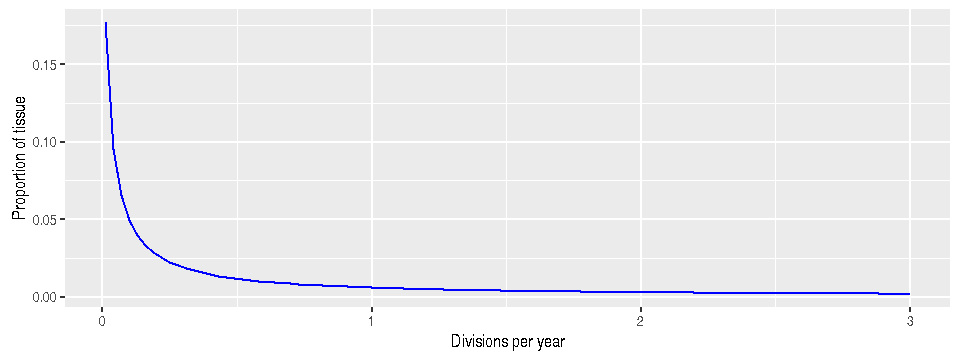

In [60]:
tissue.size <- function(x) {
    return((10^(-18.49/log10(0.5*0.0203))/3.8e9)/(2+80*x))
}
ggplot(data.frame(x = c(0.01,3)), aes(x)) + stat_function(fun = tissue.size, geom = "line", color="blue") + 
  xlab("Divisions per year") + ylab("Proportion of tissue")

Example: $r_{\mathrm{BRAF}} = 0.5 r$, $d_{\mathrm{BRAF}} = 1$ (one cell division per year), $s_{\mathrm{BRAF}} = 0.01s$ (only one in 100 melanocytes are susceptible to BRAF mutations). Then

\begin{equation*}
  \mathrm{aERS} = 18.49 + \log_{10}(0.5 r) \log_{10}(0.01s(82)-2) = -0.44,
\end{equation*}

which would still place these on the "back luck" side of the classification. 

We can also figure out the potential position of BRAF and NRAS on the Tomasetti-Vogelstein graph as a function of total tissue size.

![title](tv.png)

The gree line give the range of positions for BRAF as the tissue size varies from $0.001s$ to $s$, where $s$ is the total tissue size of melanocytes estimated by Tomasetti and Vogelstein. The red line does the same with NRAS.

### <font color="grey">  1.4. Validation</font>

We repeated the above analysis based on whole genome data of 119 melanoma samples from Australia provided by the [International Cancer Genome Consortium (ICGC)](https://dcc.icgc.org/projects?filters=%7B%22project%22:%7B%22id%22:%7B%22is%22:%5B%22MELA-AU%22%5D%7D%7D%7D). Of these, $54$ have BRAF mutations, $41$ NRAS, $12$ NF1, and $12$ are categorised as triple wild type.

In [7]:
#alldata <- read.csv("divrates_all_icgc.csv", header=TRUE, row.names=1)
load("divrates_all_icgc.Rdata")
round(all.data.icgc, 2)

,Ratio NRAS/BRAF,Ratio NF1/BRAF,Ratio NF1/NRAS,Ratio W3/BRAF,Mutation rate,Division rate NRAS,Division rate BRAF,Division rate NF1,Division rate W3
All,1.10,2.28,2.06,0.94,191.63,2.27,2.06,4.69,1.93
Male,1.12,2.29,2.05,0.98,216.74,2.29,2.04,4.68,1.99
Female,1.27,2.35,1.86,0.62,146.93,2.47,1.95,4.59,1.21


The estimates for the division rates are in the same order of magnitude. The mutation rates are higher by a factor of about $191.63/0.35 = 548$, reflecting the difference between the exome and the genome.